<a href="https://colab.research.google.com/github/MilesOAI/gpt-2-colab/blob/master/Copy_of_SkiesandClouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup:

1) Make sure GPU is enabled, go to edit->notebook settings->Hardware Accelerator GPU

2) make a copy to your google drive, click on copy to drive in panel

Note: colab will reset after 12 hours make sure to save your model checkpoints to google drive around 6 hours mark (one tick), the second tick will show up before the reset but I have lost work by not being able to save it to drive in time, then go to runtime->reset all runtimes. Now copy your train model back into colab and start training again from the previous checkpoint.

It will take about 6 hours per tick on a k80 which colab currently uses to train one tick with transfer learning for stylegan, I usually save my checkpoint at that point and reset all runtimes to start training again.

Clone the repo from github

In [1]:
!git clone https://github.com/NVlabs/stylegan.git

fatal: destination path 'stylegan' already exists and is not an empty directory.


cd into the directory

In [2]:
cd /stylegan

/stylegan


download dataset from google drive, (dataset from giacomo nanni dcgan-art-tensorflow)(https://github.com/sinanatra/DCGAN-Art-Tensorflow) (optional if you dont plan to scrape your own dataset and just testing on portraits)

In [0]:
!gdown https://drive.google.com/uc?id=1DMGmyr-SuB8ugKMafxPEYBe-4ta30aUf

another wikiart portrait dataset I scrapped recently, about 5k images

In [0]:
!wget https://www.dropbox.com/s/yk02zgrzddztazx/portrait5k.zip

if you need images from google, use a google images scrapper 

In [22]:
!apt-get update
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [60.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [23]:
!pip install selenium

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

In [26]:
!pip install google_images_download

  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [33]:
!googleimagesdownload --keywords "cloudyskies" --limit 2000 -cd /usr/bin/chromedriver


Item no.: 1 --> Item name = cloudyskies
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1. mostly-cloudy-skies-with-beautiful_nyb1vomx__f0000.png
Completed Image ====> 2. pexels-photo-983058.jpeg
Completed Image ====> 3. img_1962.jpg
Completed Image ====> 4. overcast.jpg
Completed Image ====> 5. cloudy-skies-.jpg
Completed Image ====> 6. partly-cloudy-skies-.jpg
Completed Image ====> 7. overcast_sky_by_zozziegirl-d50yjw1.jpg
Completed Image ====> 8. maxresdefault.jpg
Completed Image ====> 9. cloudy-skies.jpg
Completed Image ====> 10. cloudy-skies.jpg
Completed Image ====> 11. plane-flying-across-partly-cloudy-sky_-yvbehuxs__f0000.png
Completed Image ====> 12. maxresdefault.jpg
Completed Image ====> 13. img_7053.jpg
Completed Image ====> 14. pexels-photo-449751.jpeg
Completed Image ====> 15. pexels-photo-861333.jpeg
Completed Image ====> 16. maxresdefault.jpg
Completed Image ====> 17. pp
Completed

or use a wikiart scraper

In [0]:
!git clone https://github.com/lucasdavid/wikiart.git

In [0]:
cd wikiart

In [0]:
!cp -r /content/stylegan/ //


In [0]:
!mkdir dataset

In [0]:
!python3 wikiart.py --datadir /content/stylegan/wikiart/dataset/

or use gallery-dl to scrape flickr, tumblr etc..



In [0]:
!pip install gallery-dl

add range for how many images you want to scrape example uses flickr (note when scrapping I noticed colab will freeze around 4k to 5k images so either scrape 1k multiple times or you might have to restart colab if you set range to 1-5000)

In [0]:
!gallery-dl --range 1-1000 https://www.flickr.com/search/?text=cloudy%20skies

make directory for portraits (if you are using the default portraits datasets provided)

In [0]:
!mkdir portraitbig

move portrait zip to directory

In [0]:
!mv /content/portrait.zip /content/stylegan/portraitbig/

unzip portrait zip file

In [11]:
cd ..

/


In [0]:
!unzip portrait.zip

In [0]:
!rm portrait.zip

if not doing faces and need resize and/or augment images use Augmentor

In [34]:
!pip install Augmentor

In [107]:
from fastai.vision import *
verify_images('/content/stylegan/clouds', delete=True)

In [104]:
import Augmentor
p = Augmentor.Pipeline("/content/stylegan/stylegan/downloads/cloudysky", "/content/stylegan/clouds/", save_format="JPEG")

Initialised with 373 image(s) found.
Output directory set to /content/stylegan/clouds/.

In [0]:
p.resize(probability=1.0, width=512, height=512)

run this cell only for augmentation, see https://augmentor.readthedocs.io/en/master/ for different  features, this is for changes in color

use p.process to just resize p.sample and a higher number than original dataset to augment

In [95]:
p.process()

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FA2302ABF60>:   7%|▋         | 46/697 [00:04<01:04, 10.02 Samples/s]


AttributeError: ignored

In [108]:
p.sample(5000)

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x7FA21DD29D30>:   7%|▋         | 330/5000 [00:23<05:35, 13.91 Samples/s]


AttributeError: ignored

remove any images that cant be opened

install autocrop to crop faces if training faces

In [0]:
!pip install autocrop

    100% |████████████████████████████████| 163kB 11.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/fe/22/7b/9b262766205bc222f437ef32a5ca48427be8e41b87254afbea
Successfully built autocrop


Make directory for faces and rejected faces and then run autocrop

In [0]:
cd ..

In [0]:
!mkdir Faces

In [68]:
cd /content/stylegan

/content/stylegan


In [69]:
!autocrop -i /path/to/dataset/ -o /content/stylegan/Faces/ -w 512 -H 512 --facePercent 50 -r /content/stylegan/Rejects/ 

/bin/bash: autocrop: command not found


download latest model for transfer learning

In [12]:
cd stylegan

/stylegan


generate tfrecords

In [109]:
!python dataset_tool.py create_from_images datasets/smalls/ /content/stylegan/clouds/

Loading images from "/content/stylegan/clouds/"
Creating dataset "datasets/smalls/"
Added 822 images.


change any settings if needed

In [5]:
cd /content/stylegan/stylegan

/content/stylegan/stylegan


In [16]:
%%writefile training_loop.py 
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

"""Main training script."""

import os
import numpy as np
import tensorflow as tf
import dnnlib
import dnnlib.tflib as tflib
from dnnlib.tflib.autosummary import autosummary

import config
import train
from training import dataset
from training import misc
from metrics import metric_base

#----------------------------------------------------------------------------
# Just-in-time processing of training images before feeding them to the networks.

def process_reals(x, lod, mirror_augment, drange_data, drange_net):
    with tf.name_scope('ProcessReals'):
        with tf.name_scope('DynamicRange'):
            x = tf.cast(x, tf.float32)
            x = misc.adjust_dynamic_range(x, drange_data, drange_net)
        if mirror_augment:
            with tf.name_scope('MirrorAugment'):
                s = tf.shape(x)
                mask = tf.random_uniform([s[0], 1, 1, 1], 0.0, 1.0)
                mask = tf.tile(mask, [1, s[1], s[2], s[3]])
                x = tf.where(mask < 0.5, x, tf.reverse(x, axis=[3]))
        with tf.name_scope('FadeLOD'): # Smooth crossfade between consecutive levels-of-detail.
            s = tf.shape(x)
            y = tf.reshape(x, [-1, s[1], s[2]//2, 2, s[3]//2, 2])
            y = tf.reduce_mean(y, axis=[3, 5], keepdims=True)
            y = tf.tile(y, [1, 1, 1, 2, 1, 2])
            y = tf.reshape(y, [-1, s[1], s[2], s[3]])
            x = tflib.lerp(x, y, lod - tf.floor(lod))
        with tf.name_scope('UpscaleLOD'): # Upscale to match the expected input/output size of the networks.
            s = tf.shape(x)
            factor = tf.cast(2 ** tf.floor(lod), tf.int32)
            x = tf.reshape(x, [-1, s[1], s[2], 1, s[3], 1])
            x = tf.tile(x, [1, 1, 1, factor, 1, factor])
            x = tf.reshape(x, [-1, s[1], s[2] * factor, s[3] * factor])
        return x

#----------------------------------------------------------------------------
# Evaluate time-varying training parameters.

def training_schedule(
    cur_nimg,
    training_set,
    num_gpus,
    lod_initial_resolution  = 4,        # Image resolution used at the beginning.
    lod_training_kimg       = 600,      # Thousands of real images to show before doubling the resolution.
    lod_transition_kimg     = 600,      # Thousands of real images to show when fading in new layers.
    minibatch_base          = 16,       # Maximum minibatch size, divided evenly among GPUs.
    minibatch_dict          = {},       # Resolution-specific overrides.
    max_minibatch_per_gpu   = {},       # Resolution-specific maximum minibatch size per GPU.
    G_lrate_base            = 0.001,    # Learning rate for the generator.
    G_lrate_dict            = {},       # Resolution-specific overrides.
    D_lrate_base            = 0.001,    # Learning rate for the discriminator.
    D_lrate_dict            = {},       # Resolution-specific overrides.
    lrate_rampup_kimg       = 0,        # Duration of learning rate ramp-up.
    tick_kimg_base          = 160,      # Default interval of progress snapshots.
    tick_kimg_dict          = {4: 160, 8:140, 16:120, 32:100, 64:80, 128:60, 256:40, 512:30, 1024:20}): # Resolution-specific overrides.

    # Initialize result dict.
    s = dnnlib.EasyDict()
    s.kimg = cur_nimg / 1000.0

    # Training phase.
    phase_dur = lod_training_kimg + lod_transition_kimg
    phase_idx = int(np.floor(s.kimg / phase_dur)) if phase_dur > 0 else 0
    phase_kimg = s.kimg - phase_idx * phase_dur

    # Level-of-detail and resolution.
    s.lod = training_set.resolution_log2
    s.lod -= np.floor(np.log2(lod_initial_resolution))
    s.lod -= phase_idx
    if lod_transition_kimg > 0:
        s.lod -= max(phase_kimg - lod_training_kimg, 0.0) / lod_transition_kimg
    s.lod = max(s.lod, 0.0)
    s.resolution = 2 ** (training_set.resolution_log2 - int(np.floor(s.lod)))

    # Minibatch size.
    s.minibatch = minibatch_dict.get(s.resolution, minibatch_base)
    s.minibatch -= s.minibatch % num_gpus
    if s.resolution in max_minibatch_per_gpu:
        s.minibatch = min(s.minibatch, max_minibatch_per_gpu[s.resolution] * num_gpus)

    # Learning rate.
    s.G_lrate = G_lrate_dict.get(s.resolution, G_lrate_base)
    s.D_lrate = D_lrate_dict.get(s.resolution, D_lrate_base)
    if lrate_rampup_kimg > 0:
        rampup = min(s.kimg / lrate_rampup_kimg, 1.0)
        s.G_lrate *= rampup
        s.D_lrate *= rampup

    # Other parameters.
    s.tick_kimg = tick_kimg_dict.get(s.resolution, tick_kimg_base)
    return s

#----------------------------------------------------------------------------
# Main training script.

def training_loop(
    submit_config,
    G_args                  = {},       # Options for generator network.
    D_args                  = {},       # Options for discriminator network.
    G_opt_args              = {},       # Options for generator optimizer.
    D_opt_args              = {},       # Options for discriminator optimizer.
    G_loss_args             = {},       # Options for generator loss.
    D_loss_args             = {},       # Options for discriminator loss.
    dataset_args            = {},       # Options for dataset.load_dataset().
    sched_args              = {},       # Options for train.TrainingSchedule.
    grid_args               = {},       # Options for train.setup_snapshot_image_grid().
    metric_arg_list         = [],       # Options for MetricGroup.
    tf_config               = {},       # Options for tflib.init_tf().
    G_smoothing_kimg        = 10.0,     # Half-life of the running average of generator weights.
    D_repeats               = 1,        # How many times the discriminator is trained per G iteration.
    minibatch_repeats       = 4,        # Number of minibatches to run before adjusting training parameters.
    reset_opt_for_new_lod   = True,     # Reset optimizer internal state (e.g. Adam moments) when new layers are introduced?
    total_kimg              = 15000,    # Total length of the training, measured in thousands of real images.
    mirror_augment          = True,    # Enable mirror augment?
    drange_net              = [-1,1],   # Dynamic range used when feeding image data to the networks.
    image_snapshot_ticks    = 1,        # How often to export image snapshots?
    network_snapshot_ticks  = 1,       # How often to export network snapshots?
    save_tf_graph           = False,    # Include full TensorFlow computation graph in the tfevents file?
    save_weight_histograms  = False,    # Include weight histograms in the tfevents file?
    resume_run_id           = "/2019-03-08-stylegan-animefaces-network-02051-021980.pkl",     # Run ID or network pkl to resume training from, None = start from scratch.
    resume_snapshot         = None,     # Snapshot index to resume training from, None = autodetect.
    resume_kimg             = 11155,      # Assumed training progress at the beginning. Affects reporting and training schedule.
    resume_time             = 0.0):     # Assumed wallclock time at the beginning. Affects reporting.

    # Initialize dnnlib and TensorFlow.
    ctx = dnnlib.RunContext(submit_config, train)
    tflib.init_tf(tf_config)

    # Load training set.
    training_set = dataset.load_dataset(data_dir=config.data_dir, verbose=True, **dataset_args)

    # Construct networks.
    with tf.device('/gpu:0'):
        if resume_run_id is not None:
            network_pkl = misc.locate_network_pkl(resume_run_id, resume_snapshot)
            print('Loading networks from "%s"...' % network_pkl)
            G, D, Gs = misc.load_pkl(network_pkl)
        else:
            print('Constructing networks...')
            G = tflib.Network('G', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **G_args)
            D = tflib.Network('D', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **D_args)
            Gs = G.clone('Gs')
    G.print_layers(); D.print_layers()

    print('Building TensorFlow graph...')
    with tf.name_scope('Inputs'), tf.device('/cpu:0'):
        lod_in          = tf.placeholder(tf.float32, name='lod_in', shape=[])
        lrate_in        = tf.placeholder(tf.float32, name='lrate_in', shape=[])
        minibatch_in    = tf.placeholder(tf.int32, name='minibatch_in', shape=[])
        minibatch_split = minibatch_in // submit_config.num_gpus
        Gs_beta         = 0.5 ** tf.div(tf.cast(minibatch_in, tf.float32), G_smoothing_kimg * 1000.0) if G_smoothing_kimg > 0.0 else 0.0

    G_opt = tflib.Optimizer(name='TrainG', learning_rate=lrate_in, **G_opt_args)
    D_opt = tflib.Optimizer(name='TrainD', learning_rate=lrate_in, **D_opt_args)
    for gpu in range(submit_config.num_gpus):
        with tf.name_scope('GPU%d' % gpu), tf.device('/gpu:%d' % gpu):
            G_gpu = G if gpu == 0 else G.clone(G.name + '_shadow')
            D_gpu = D if gpu == 0 else D.clone(D.name + '_shadow')
            lod_assign_ops = [tf.assign(G_gpu.find_var('lod'), lod_in), tf.assign(D_gpu.find_var('lod'), lod_in)]
            reals, labels = training_set.get_minibatch_tf()
            reals = process_reals(reals, lod_in, mirror_augment, training_set.dynamic_range, drange_net)
            with tf.name_scope('G_loss'), tf.control_dependencies(lod_assign_ops):
                G_loss = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=G_opt, training_set=training_set, minibatch_size=minibatch_split, **G_loss_args)
            with tf.name_scope('D_loss'), tf.control_dependencies(lod_assign_ops):
                D_loss = dnnlib.util.call_func_by_name(G=G_gpu, D=D_gpu, opt=D_opt, training_set=training_set, minibatch_size=minibatch_split, reals=reals, labels=labels, **D_loss_args)
            G_opt.register_gradients(tf.reduce_mean(G_loss), G_gpu.trainables)
            D_opt.register_gradients(tf.reduce_mean(D_loss), D_gpu.trainables)
    G_train_op = G_opt.apply_updates()
    D_train_op = D_opt.apply_updates()

    Gs_update_op = Gs.setup_as_moving_average_of(G, beta=Gs_beta)
    with tf.device('/gpu:0'):
        try:
            peak_gpu_mem_op = tf.contrib.memory_stats.MaxBytesInUse()
        except tf.errors.NotFoundError:
            peak_gpu_mem_op = tf.constant(0)

    print('Setting up snapshot image grid...')
    grid_size, grid_reals, grid_labels, grid_latents = misc.setup_snapshot_image_grid(G, training_set, **grid_args)
    sched = training_schedule(cur_nimg=total_kimg*1000, training_set=training_set, num_gpus=submit_config.num_gpus, **sched_args)
    grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch//submit_config.num_gpus)

    print('Setting up run dir...')
    misc.save_image_grid(grid_reals, os.path.join(submit_config.run_dir, 'reals.png'), drange=training_set.dynamic_range, grid_size=grid_size)
    misc.save_image_grid(grid_fakes, os.path.join(submit_config.run_dir, 'fakes%06d.png' % resume_kimg), drange=drange_net, grid_size=grid_size)
    summary_log = tf.summary.FileWriter(submit_config.run_dir)
    if save_tf_graph:
        summary_log.add_graph(tf.get_default_graph())
    if save_weight_histograms:
        G.setup_weight_histograms(); D.setup_weight_histograms()
    metrics = metric_base.MetricGroup(metric_arg_list)

    print('Training...\n')
    ctx.update('', cur_epoch=resume_kimg, max_epoch=total_kimg)
    maintenance_time = ctx.get_last_update_interval()
    cur_nimg = int(resume_kimg * 1000)
    cur_tick = 0
    tick_start_nimg = cur_nimg
    prev_lod = -1.0
    while cur_nimg < total_kimg * 1000:
        if ctx.should_stop(): break

        # Choose training parameters and configure training ops.
        sched = training_schedule(cur_nimg=cur_nimg, training_set=training_set, num_gpus=submit_config.num_gpus, **sched_args)
        training_set.configure(sched.minibatch // submit_config.num_gpus, sched.lod)
        if reset_opt_for_new_lod:
            if np.floor(sched.lod) != np.floor(prev_lod) or np.ceil(sched.lod) != np.ceil(prev_lod):
                G_opt.reset_optimizer_state(); D_opt.reset_optimizer_state()
        prev_lod = sched.lod

        # Run training ops.
        for _mb_repeat in range(minibatch_repeats):
            for _D_repeat in range(D_repeats):
                tflib.run([D_train_op, Gs_update_op], {lod_in: sched.lod, lrate_in: sched.D_lrate, minibatch_in: sched.minibatch})
                cur_nimg += sched.minibatch
            tflib.run([G_train_op], {lod_in: sched.lod, lrate_in: sched.G_lrate, minibatch_in: sched.minibatch})

        # Perform maintenance tasks once per tick.
        done = (cur_nimg >= total_kimg * 1000)
        if cur_nimg >= tick_start_nimg + sched.tick_kimg * 1000 or done:
            cur_tick += 1
            tick_kimg = (cur_nimg - tick_start_nimg) / 1000.0
            tick_start_nimg = cur_nimg
            tick_time = ctx.get_time_since_last_update()
            total_time = ctx.get_time_since_start() + resume_time

            # Report progress.
            print('tick %-5d kimg %-8.1f lod %-5.2f minibatch %-4d time %-12s sec/tick %-7.1f sec/kimg %-7.2f maintenance %-6.1f gpumem %-4.1f' % (
                autosummary('Progress/tick', cur_tick),
                autosummary('Progress/kimg', cur_nimg / 1000.0),
                autosummary('Progress/lod', sched.lod),
                autosummary('Progress/minibatch', sched.minibatch),
                dnnlib.util.format_time(autosummary('Timing/total_sec', total_time)),
                autosummary('Timing/sec_per_tick', tick_time),
                autosummary('Timing/sec_per_kimg', tick_time / tick_kimg),
                autosummary('Timing/maintenance_sec', maintenance_time),
                autosummary('Resources/peak_gpu_mem_gb', peak_gpu_mem_op.eval() / 2**30)))
            autosummary('Timing/total_hours', total_time / (60.0 * 60.0))
            autosummary('Timing/total_days', total_time / (24.0 * 60.0 * 60.0))

            # Save snapshots.
            if cur_tick % image_snapshot_ticks == 0 or done:
                grid_fakes = Gs.run(grid_latents, grid_labels, is_validation=True, minibatch_size=sched.minibatch//submit_config.num_gpus)
                misc.save_image_grid(grid_fakes, os.path.join(submit_config.run_dir, 'fakes%06d.png' % (cur_nimg // 1000)), drange=drange_net, grid_size=grid_size)
            if cur_tick % network_snapshot_ticks == 0 or done or cur_tick == 1:
                pkl = os.path.join(submit_config.run_dir, 'network-snapshot-%06d.pkl' % (cur_nimg // 1000))
                misc.save_pkl((G, D, Gs), pkl)
                metrics.run(pkl, run_dir=submit_config.run_dir, num_gpus=submit_config.num_gpus, tf_config=tf_config)

            # Update summaries and RunContext.
            metrics.update_autosummaries()
            tflib.autosummary.save_summaries(summary_log, cur_nimg)
            ctx.update('%.2f' % sched.lod, cur_epoch=cur_nimg // 1000, max_epoch=total_kimg)
            maintenance_time = ctx.get_last_update_interval() - tick_time

    # Write final results.
    misc.save_pkl((G, D, Gs), os.path.join(submit_config.run_dir, 'network-final.pkl'))
    summary_log.close()

    ctx.close()

#----------------------------------------------------------------------------


Overwriting training_loop.py


In [20]:
cd ..

/content/stylegan/stylegan


In [113]:
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

"""Main entry point for training StyleGAN and ProGAN networks."""

import copy
import dnnlib
from dnnlib import EasyDict

import config
from metrics import metric_base

#----------------------------------------------------------------------------
# Official training configs for StyleGAN, targeted mainly for FFHQ.

if 1:
    desc          = 'sgan'                                                                 # Description string included in result subdir name.
    train         = EasyDict(run_func_name='training.training_loop.training_loop')         # Options for training loop.
    G             = EasyDict(func_name='training.networks_stylegan.G_style')               # Options for generator network.
    D             = EasyDict(func_name='training.networks_stylegan.D_basic')               # Options for discriminator network.
    G_opt         = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                          # Options for generator optimizer.
    D_opt         = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                          # Options for discriminator optimizer.
    G_loss        = EasyDict(func_name='training.loss.G_logistic_nonsaturating')           # Options for generator loss.
    D_loss        = EasyDict(func_name='training.loss.D_logistic_simplegp', r1_gamma=10.0) # Options for discriminator loss.
    dataset       = EasyDict()                                                             # Options for load_dataset().
    sched         = EasyDict()                                                             # Options for TrainingSchedule.
    grid          = EasyDict(size='4k', layout='random')                                   # Options for setup_snapshot_image_grid().
    #metrics       = [metric_base.fid50k]                                                   # Options for MetricGroup.
    submit_config = dnnlib.SubmitConfig()                                                  # Options for dnnlib.submit_run().
    tf_config     = {'rnd.np_random_seed': 1000}                                           # Options for tflib.init_tf().

    # Dataset.
    desc += '-custom';     dataset = EasyDict(tfrecord_dir='smalls');              train.mirror_augment = True
    #desc += '-celebahq'; dataset = EasyDict(tfrecord_dir='celebahq');          train.mirror_augment = True
    #desc += '-bedroom';  dataset = EasyDict(tfrecord_dir='lsun-bedroom-full'); train.mirror_augment = False
    #desc += '-car';      dataset = EasyDict(tfrecord_dir='lsun-car-512x384');  train.mirror_augment = False
    #desc += '-cat';      dataset = EasyDict(tfrecord_dir='lsun-cat-full');     train.mirror_augment = False

    # Number of GPUs.
    desc += '-1gpu'; submit_config.num_gpus = 1; sched.minibatch_base = 4; sched.minibatch_dict = {4: 128, 8: 128, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8, 512: 4}
    #desc += '-2gpu'; submit_config.num_gpus = 2; sched.minibatch_base = 8; sched.minibatch_dict = {4: 256, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8}
    #desc += '-4gpu'; submit_config.num_gpus = 4; sched.minibatch_base = 16; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16}
    #desc += '-8gpu'; submit_config.num_gpus = 8; sched.minibatch_base = 32; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32}

    # Default options.
    train.total_kimg = 25000
    sched.lod_initial_resolution = 8
    sched.G_lrate_dict = {128: 0.0015, 256: 0.002, 512: 0.003, 1024: 0.003}
    sched.D_lrate_dict = EasyDict(sched.G_lrate_dict)

    # WGAN-GP loss for CelebA-HQ.
    #desc += '-wgangp'; G_loss = EasyDict(func_name='training.loss.G_wgan'); D_loss = EasyDict(func_name='training.loss.D_wgan_gp'); sched.G_lrate_dict = {k: min(v, 0.002) for k, v in sched.G_lrate_dict.items()}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict)

    # Table 1.
    #desc += '-tuned-baseline'; G.use_styles = False; G.use_pixel_norm = True; G.use_instance_norm = False; G.mapping_layers = 0; G.truncation_psi = None; G.const_input_layer = False; G.style_mixing_prob = 0.0; G.use_noise = False
    #desc += '-add-mapping-and-styles'; G.const_input_layer = False; G.style_mixing_prob = 0.0; G.use_noise = False
    #desc += '-remove-traditional-input'; G.style_mixing_prob = 0.0; G.use_noise = False
    #desc += '-add-noise-inputs'; G.style_mixing_prob = 0.0
    #desc += '-mixing-regularization' # default

    # Table 2.
    #desc += '-mix0'; G.style_mixing_prob = 0.0
    #desc += '-mix50'; G.style_mixing_prob = 0.5
    #desc += '-mix90'; G.style_mixing_prob = 0.9 # default
    #desc += '-mix100'; G.style_mixing_prob = 1.0

    # Table 4.
    #desc += '-traditional-0'; G.use_styles = False; G.use_pixel_norm = True; G.use_instance_norm = False; G.mapping_layers = 0; G.truncation_psi = None; G.const_input_layer = False; G.style_mixing_prob = 0.0; G.use_noise = False
    #desc += '-traditional-8'; G.use_styles = False; G.use_pixel_norm = True; G.use_instance_norm = False; G.mapping_layers = 8; G.truncation_psi = None; G.const_input_layer = False; G.style_mixing_prob = 0.0; G.use_noise = False
    #desc += '-stylebased-0'; G.mapping_layers = 0
    #desc += '-stylebased-1'; G.mapping_layers = 1
    #desc += '-stylebased-2'; G.mapping_layers = 2
    #desc += '-stylebased-8'; G.mapping_layers = 8 # default

#----------------------------------------------------------------------------
# Official training configs for Progressive GAN, targeted mainly for CelebA-HQ.

if 0:
    desc          = 'pgan'                                                         # Description string included in result subdir name.
    train         = EasyDict(run_func_name='training.training_loop.training_loop') # Options for training loop.
    G             = EasyDict(func_name='training.networks_progan.G_paper')         # Options for generator network.
    D             = EasyDict(func_name='training.networks_progan.D_paper')         # Options for discriminator network.
    G_opt         = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                  # Options for generator optimizer.
    D_opt         = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8)                  # Options for discriminator optimizer.
    G_loss        = EasyDict(func_name='training.loss.G_wgan')                     # Options for generator loss.
    D_loss        = EasyDict(func_name='training.loss.D_wgan_gp')                  # Options for discriminator loss.
    dataset       = EasyDict()                                                     # Options for load_dataset().
    sched         = EasyDict()                                                     # Options for TrainingSchedule.
    grid          = EasyDict(size='1080p', layout='random')                        # Options for setup_snapshot_image_grid().
    #metrics       = [metric_base.fid50k]                                           # Options for MetricGroup.
    submit_config = dnnlib.SubmitConfig()                                          # Options for dnnlib.submit_run().
    tf_config     = {'rnd.np_random_seed': 1000}                                   # Options for tflib.init_tf().

    # Dataset (choose one).
    #desc += '-celebahq';            dataset = EasyDict(tfrecord_dir='celebahq'); train.mirror_augment = True
    #desc += '-celeba';              dataset = EasyDict(tfrecord_dir='celeba'); train.mirror_augment = True
    #desc += '-cifar10';             dataset = EasyDict(tfrecord_dir='cifar10')
    #desc += '-cifar100';            dataset = EasyDict(tfrecord_dir='cifar100')
    #desc += '-svhn';                dataset = EasyDict(tfrecord_dir='svhn')
    #desc += '-mnist';               dataset = EasyDict(tfrecord_dir='mnist')
    #desc += '-mnistrgb';            dataset = EasyDict(tfrecord_dir='mnistrgb')
    #desc += '-syn1024rgb';          dataset = EasyDict(class_name='training.dataset.SyntheticDataset', resolution=1024, num_channels=3)
    #desc += '-lsun-airplane';       dataset = EasyDict(tfrecord_dir='lsun-airplane-100k');       train.mirror_augment = True
    #desc += '-lsun-bedroom';        dataset = EasyDict(tfrecord_dir='lsun-bedroom-100k');        train.mirror_augment = True
    #desc += '-lsun-bicycle';        dataset = EasyDict(tfrecord_dir='lsun-bicycle-100k');        train.mirror_augment = True
    #desc += '-lsun-bird';           dataset = EasyDict(tfrecord_dir='lsun-bird-100k');           train.mirror_augment = True
    #desc += '-lsun-boat';           dataset = EasyDict(tfrecord_dir='lsun-boat-100k');           train.mirror_augment = True
    #desc += '-lsun-bottle';         dataset = EasyDict(tfrecord_dir='lsun-bottle-100k');         train.mirror_augment = True
    #desc += '-lsun-bridge';         dataset = EasyDict(tfrecord_dir='lsun-bridge-100k');         train.mirror_augment = True
    #desc += '-lsun-bus';            dataset = EasyDict(tfrecord_dir='lsun-bus-100k');            train.mirror_augment = True
    #desc += '-lsun-car';            dataset = EasyDict(tfrecord_dir='lsun-car-100k');            train.mirror_augment = True
    #desc += '-lsun-cat';            dataset = EasyDict(tfrecord_dir='lsun-cat-100k');            train.mirror_augment = True
    #desc += '-lsun-chair';          dataset = EasyDict(tfrecord_dir='lsun-chair-100k');          train.mirror_augment = True
    #desc += '-lsun-churchoutdoor';  dataset = EasyDict(tfrecord_dir='lsun-churchoutdoor-100k');  train.mirror_augment = True
    #desc += '-lsun-classroom';      dataset = EasyDict(tfrecord_dir='lsun-classroom-100k');      train.mirror_augment = True
    #desc += '-lsun-conferenceroom'; dataset = EasyDict(tfrecord_dir='lsun-conferenceroom-100k'); train.mirror_augment = True
    #desc += '-lsun-cow';            dataset = EasyDict(tfrecord_dir='lsun-cow-100k');            train.mirror_augment = True
    #desc += '-lsun-diningroom';     dataset = EasyDict(tfrecord_dir='lsun-diningroom-100k');     train.mirror_augment = True
    #desc += '-lsun-diningtable';    dataset = EasyDict(tfrecord_dir='lsun-diningtable-100k');    train.mirror_augment = True
    #desc += '-lsun-dog';            dataset = EasyDict(tfrecord_dir='lsun-dog-100k');            train.mirror_augment = True
    #desc += '-lsun-horse';          dataset = EasyDict(tfrecord_dir='lsun-horse-100k');          train.mirror_augment = True
    #desc += '-lsun-kitchen';        dataset = EasyDict(tfrecord_dir='lsun-kitchen-100k');        train.mirror_augment = True
    #desc += '-lsun-livingroom';     dataset = EasyDict(tfrecord_dir='lsun-livingroom-100k');     train.mirror_augment = True
    #desc += '-lsun-motorbike';      dataset = EasyDict(tfrecord_dir='lsun-motorbike-100k');      train.mirror_augment = True
    #desc += '-lsun-person';         dataset = EasyDict(tfrecord_dir='lsun-person-100k');         train.mirror_augment = True
    #desc += '-lsun-pottedplant';    dataset = EasyDict(tfrecord_dir='lsun-pottedplant-100k');    train.mirror_augment = True
    #desc += '-lsun-restaurant';     dataset = EasyDict(tfrecord_dir='lsun-restaurant-100k');     train.mirror_augment = True
    #desc += '-lsun-sheep';          dataset = EasyDict(tfrecord_dir='lsun-sheep-100k');          train.mirror_augment = True
    #desc += '-lsun-sofa';           dataset = EasyDict(tfrecord_dir='lsun-sofa-100k');           train.mirror_augment = True
    #desc += '-lsun-tower';          dataset = EasyDict(tfrecord_dir='lsun-tower-100k');          train.mirror_augment = True
    #desc += '-lsun-train';          dataset = EasyDict(tfrecord_dir='lsun-train-100k');          train.mirror_augment = True
    #desc += '-lsun-tvmonitor';      dataset = EasyDict(tfrecord_dir='lsun-tvmonitor-100k');      train.mirror_augment = True

    # Conditioning & snapshot options.
    #desc += '-cond'; dataset.max_label_size = 'full' # conditioned on full label
    #desc += '-cond1'; dataset.max_label_size = 1 # conditioned on first component of the label
    #desc += '-g4k'; grid.size = '4k'
    #desc += '-grpc'; grid.layout = 'row_per_class'

    # Config presets (choose one).
    #desc += '-preset-v1-1gpu'; submit_config.num_gpus = 1; D.mbstd_group_size = 16; sched.minibatch_base = 16; sched.minibatch_dict = {256: 14, 512: 6, 1024: 3}; sched.lod_training_kimg = 800; sched.lod_transition_kimg = 800; train.total_kimg = 19000
    #desc += '-preset-v2-1gpu'; submit_config.num_gpus = 1; sched.minibatch_base = 4; sched.minibatch_dict = {4: 128, 8: 128, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8, 512: 4}; sched.G_lrate_dict = {1024: 0.0015}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
    #desc += '-preset-v2-2gpus'; submit_config.num_gpus = 2; sched.minibatch_base = 8; sched.minibatch_dict = {4: 256, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8}; sched.G_lrate_dict = {512: 0.0015, 1024: 0.002}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
    #desc += '-preset-v2-4gpus'; submit_config.num_gpus = 4; sched.minibatch_base = 16; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16}; sched.G_lrate_dict = {256: 0.0015, 512: 0.002, 1024: 0.003}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
    #desc += '-preset-v2-8gpus'; submit_config.num_gpus = 8; sched.minibatch_base = 32; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32}; sched.G_lrate_dict = {128: 0.0015, 256: 0.002, 512: 0.003, 1024: 0.003}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000

    # Numerical precision (choose one).
    #desc += '-fp32'; sched.max_minibatch_per_gpu = {256: 16, 512: 8, 1024: 4}
    #desc += '-fp16'; G.dtype = 'float16'; D.dtype = 'float16'; G.pixelnorm_epsilon=1e-4; G_opt.use_loss_scaling = True; D_opt.use_loss_scaling = True; sched.max_minibatch_per_gpu = {512: 16, 1024: 8}

    # Disable individual features.
    #desc += '-nogrowing'; sched.lod_initial_resolution = 1024; sched.lod_training_kimg = 0; sched.lod_transition_kimg = 0; train.total_kimg = 10000
    #desc += '-nopixelnorm'; G.use_pixelnorm = False
    #desc += '-nowscale'; G.use_wscale = False; D.use_wscale = False
    #desc += '-noleakyrelu'; G.use_leakyrelu = False
    #desc += '-nosmoothing'; train.G_smoothing_kimg = 0.0
    #desc += '-norepeat'; train.minibatch_repeats = 1
    #desc += '-noreset'; train.reset_opt_for_new_lod = False

    # Special modes.
    #desc += '-BENCHMARK'; sched.lod_initial_resolution = 4; sched.lod_training_kimg = 3; sched.lod_transition_kimg = 3; train.total_kimg = (8*2+1)*3; sched.tick_kimg_base = 1; sched.tick_kimg_dict = {}; train.image_snapshot_ticks = 1000; train.network_snapshot_ticks = 1000
    #desc += '-BENCHMARK0'; sched.lod_initial_resolution = 1024; train.total_kimg = 10; sched.tick_kimg_base = 1; sched.tick_kimg_dict = {}; train.image_snapshot_ticks = 1000; train.network_snapshot_ticks = 1000
    desc += '-VERBOSE'; sched.tick_kimg_base = 1; sched.tick_kimg_dict = {}; train.image_snapshot_ticks = 1; train.network_snapshot_ticks = 100
    #desc += '-GRAPH'; train.save_tf_graph = True
    #desc += '-HIST'; train.save_weight_histograms = True

#----------------------------------------------------------------------------
# Main entry point for training.
# Calls the function indicated by 'train' using the selected options.

def main():
    kwargs = EasyDict(train)
    kwargs.update(G_args=G, D_args=D, G_opt_args=G_opt, D_opt_args=D_opt, G_loss_args=G_loss, D_loss_args=D_loss)
    kwargs.update(dataset_args=dataset, sched_args=sched, grid_args=grid, tf_config=tf_config)
    kwargs.submit_config = copy.deepcopy(submit_config)
    kwargs.submit_config.run_dir_root = dnnlib.submission.submit.get_template_from_path(config.result_dir)
    kwargs.submit_config.run_dir_ignore += config.run_dir_ignore
    kwargs.submit_config.run_desc = desc
    dnnlib.submit_run(**kwargs)

#----------------------------------------------------------------------------

if __name__ == "__main__":
    main()

#----------------------------------------------------------------------------


Creating the run dir root: results
Creating the run dir: results/00000-sgan-custom-1gpu
Copying files to the run dir
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Colocations handled automatically by placer.
Dataset shape = [3, 512, 512]
Dynamic range = [0, 255]
Label size    = 0
Loading networks from "/2019-03-08-stylegan-animefaces-network-02051-021980.pkl"...

G                             Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)         

KeyboardInterrupt: ignored

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: ignored

using trained model to generate images and interpolations video (slighty modfied from gene kogans fork here https://github.com/genekogan/stylegan/blob/master/generate.ipynb)

In [0]:
import os
import pickle
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config
import moviepy.editor as mpy
from tqdm import tqdm_notebook as tqdm

tflib.init_tf()

In [19]:
model = '/content/stylegan/stylegan/results/00000-sgan-custom-1gpu/network-snapshot-011185.pkl'

with open(model, 'rb') as f:
    _G, _D, Gs = pickle.load(f)

fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
cd content/stylegan/stylegan

/content/stylegan/stylegan


In [0]:
truncation = .7


def bookmark(latents, new_faves):
    for f in new_faves:
        faves.append(latents[f])

def show_faves(faves):
    latents = np.array(faves)
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])
    n = len(faves)
    nr, nc = math.ceil(n / 6), 6
    for r in range(nr):
        images = Gs.run(latents[6*r:min(n-1, 6*(r+1))], None, truncation_psi=truncation, randomize_noise=False, output_transform=fmt)
        img1 = np.concatenate([img for img in images], axis=1)
        plt.figure(figsize=(24,4))
        plt.imshow(img1)
        
def random_sample(num_images, scale):
    latents = np.random.RandomState(int(1000*random.random())).randn(num_images, *Gs.input_shapes[0][1:])
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])
    images = Gs.run(latents, None, truncation_psi=truncation, randomize_noise=False, output_transform=fmt)
    images_ct = np.concatenate([img for img in images], axis=1)
    plt.figure(figsize=(scale*num_images, scale))
    plt.imshow(images_ct)
    return images, latents

def get_latent_interpolation(endpoints, num_frames_per, mode, shuffle):
    if shuffle:
        random.shuffle(endpoints)
    num_endpoints, dim = len(endpoints), len(endpoints[0])
    num_frames = num_frames_per * num_endpoints
    endpoints = np.array(endpoints)
    latents = np.zeros((num_frames, dim))
    for e in range(num_endpoints):
        e1, e2 = e, (e+1)%num_endpoints
        for t in range(num_frames_per):
            frame = e * num_frames_per + t
            r = 0.5 - 0.5 * np.cos(np.pi*t/(num_frames_per-1)) if mode == 'ease' else float(t) / num_frames_per
            latents[frame, :] = (1.0-r) * endpoints[e1,:] + r * endpoints[e2,:]
    return latents

def get_latent_interpolation_bspline(endpoints, nf, k, s, shuffle):
    if shuffle:
        random.shuffle(endpoints)
    x = np.array(endpoints)
    x = np.append(x, x[0,:].reshape(1, x.shape[1]), axis=0)
    nd = x.shape[1]
    latents = np.zeros((nd, nf))
    nss = list(range(1, 10)) + [10]*(nd-19) + list(range(10,0,-1))
    for i in tqdm(range(nd-9)):
        idx = list(range(i,i+10))
        tck, u = interpolate.splprep([x[:,j] for j in range(i,i+10)], k=k, s=s)
        out = interpolate.splev(np.linspace(0, 1, num=nf, endpoint=True), tck)
        latents[i:i+10,:] += np.array(out)
    latents = latents / np.array(nss).reshape((512,1))
    return latents.T


def generate_images(latents, labels):
    batch_size = 8
    num_frames = latents.shape[0]
    num_batches = int(np.ceil(num_frames/batch_size))
    images = []
    for b in tqdm(range(num_batches)):
        new_images = Gs.run(latents[b*batch_size:min((b+1)*batch_size, num_frames-1), :], None, truncation_psi=truncation, randomize_noise=False, output_transform=fmt)
        for img in new_images:
            images.append(img)
    return images

def make_movie(images, out_dir, out_name):
    temp_dir = 'frames%06d'%int(1000000*random.random())
    os.system('mkdir %s'%temp_dir)
    for idx in tqdm(range(len(images))):
        PIL.Image.fromarray(images[idx], 'RGB').save('%s/frame%05d.png' % (temp_dir, idx))
    cmd = 'ffmpeg -i %s/frame%%05d.png -c:v libx264 -pix_fmt yuv420p %s/%s.mp4' % (temp_dir, out_dir, out_name)
    print(cmd)
    os.system(cmd)
    os.system('rm -rf %s'%temp_dir)

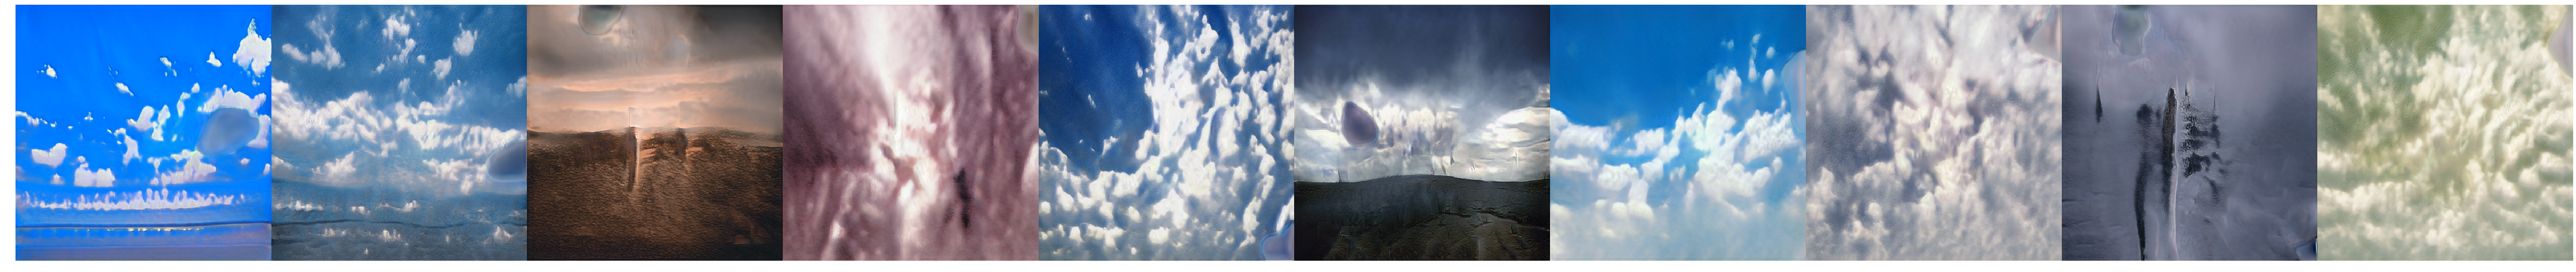

In [32]:
from google.colab import files

def random_sample(num_images, scale):
    latents = np.random.RandomState(int(1000*random.random())).randn(num_images, *Gs.input_shapes[0][1:])
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])
    images = Gs.run(latents, None, truncation_psi=truncation, randomize_noise=False, output_transform=fmt)
    images_ct = np.concatenate([img for img in images], axis=1)
    plt.figure(figsize=(scale*num_images, scale))
    plt.imshow(images_ct)
    plt.axis('off')
    plt.savefig('download.png')
    return images, latents

images, latents = random_sample(10, scale=10)


files.download('download.png')

In [23]:
latents = get_latent_interpolation(latents, 30, 'linear', False)
labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

images = generate_images(latents, labels)    

make_movie(images, '.', 'nao')


ffmpeg -i frames550625/frame%05d.png -c:v libx264 -pix_fmt yuv420p ./nao.mp4
